In [1]:
from PIL import Image
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [18]:
X = []

In [19]:
images_folder = r'D:\A.papis\diabetes\REFUGE-Validation400'
filenames = [os.path.join(images_folder,file) for file in os.listdir(images_folder) if file.endswith(".jpg")]
for i in filenames:
    img = cv2.imread(i,1)
    resized_img = cv2.resize(img,(256, 256), interpolation = cv2.INTER_CUBIC)
    
    X.append(resized_img)

In [2]:
Y=[]
images_folder = r'D:\A.papis\diabetes\REFUGE-Validation400-GT\Disc_Cup_Masks'
filenames = [os.path.join(images_folder,file) for file in os.listdir(images_folder) if file.endswith(".bmp")]
for i in filenames:
    img = cv2.imread(i,0)
    resized_img = cv2.resize(img,(256, 256), interpolation = cv2.INTER_CUBIC)
    
    Y.append(resized_img)

In [5]:
print(len(Y))

400


In [6]:
#X = np.array(X)
Y = np.array(Y)

In [7]:
print(Y.shape)

(400, 256, 256)


(array([2.9100e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        2.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        6.0000e+00, 0.0000e+00, 3.0000e+00, 3.0000e+00, 8.0000e+00,
        8.1700e+02, 1.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        3.0000e+00, 0.0000e+00, 1.0000e+00, 0.00

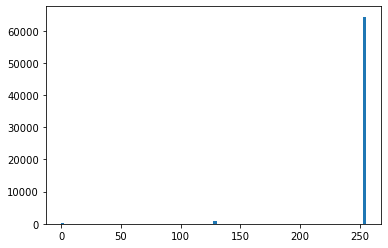

In [24]:
plt.hist(Y[0].flat,bins=100,range=(0,255))

In [25]:
import cv2
disc = []
for i in range(len(Y)):
    ret,th = cv2.threshold(Y[i],254,255,cv2.THRESH_BINARY_INV)
    disc.append(th)

In [26]:
print(len(disc))

400


In [27]:
disc = np.array(disc)

In [28]:
print(disc.shape)

(400, 256, 256)


In [141]:
cup = []
for i in range(len(Y)):
    ret,th = cv2.threshold(Y[i],101,255,cv2.THRESH_BINARY_INV)#121
    cup.append(th)

In [142]:
print(len(cup))

400


In [143]:
cup = np.array(cup)

In [144]:
print(cup.shape)

(400, 256, 256)


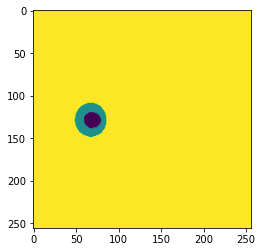

In [8]:
plt.imshow(Y[0])

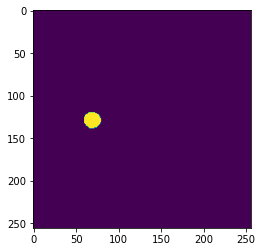

In [146]:
plt.imshow(cup[0])

In [147]:
def img(i):
    plt.figure(figsize=(20,20))

    plt.subplots_adjust(wspace = 0.4, hspace= 0.4)


    plt.subplot(3,3,1)
    plt.title("mask",size=25)
    plt.imshow(Y[i])
    #plt.axis('off')
  


    plt.subplot(3,3,2)
    plt.title("disc",size=25)
    plt.imshow(disc[i])
    #plt.axis('off')


    plt.subplot(3,3,3)
    plt.title("cup",size=25)
    plt.imshow(cup[i])
    #plt.axis('off')


  


  #plt.subplot(3,3,3)
  #plt.title("overlay",size=25)
  #plt.imshow(x_test[i], cmap=get_cmap(x_test))
  #plt.imshow(mask_to_red(zero_pad_mask(y_pred_img[i], desired_size=256)), cmap=get_cmap(y_pred_img), alpha=0.5)
  #plt.axis('off')
  



  #plt.savefig('predict_img_siri/{0}.jpg'.format(b[i]))

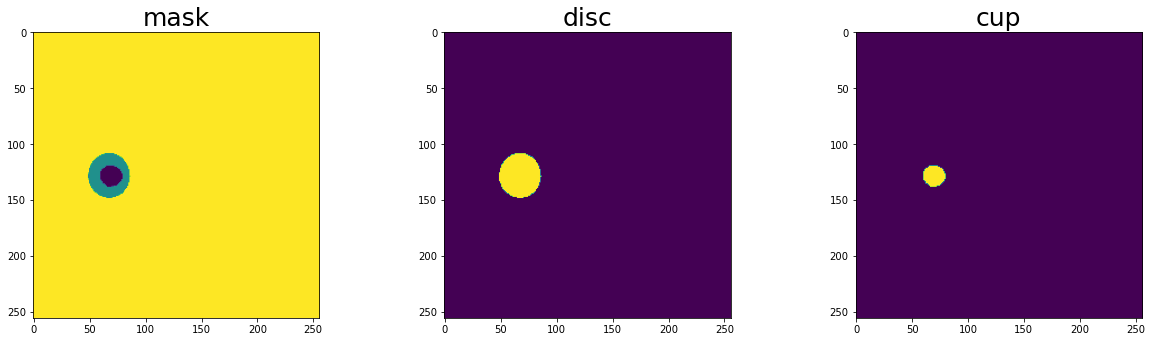

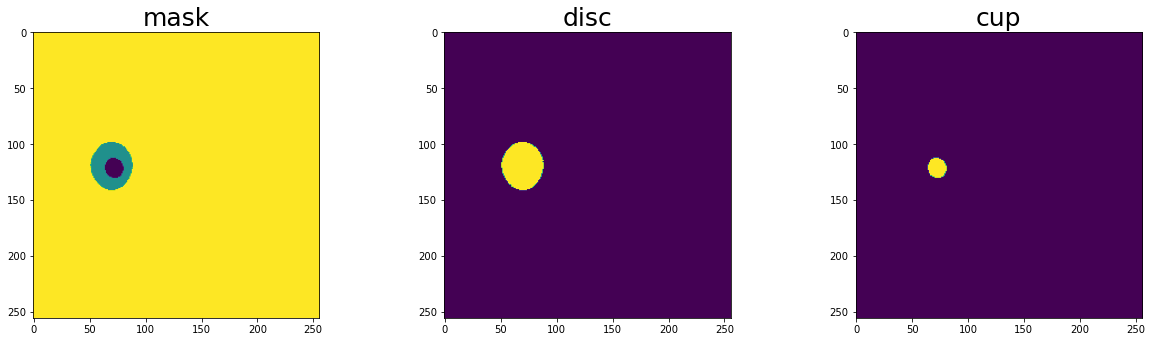

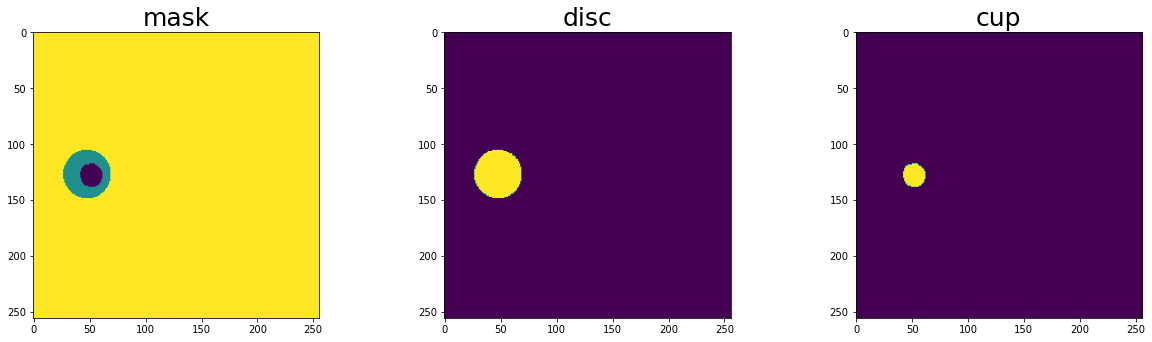

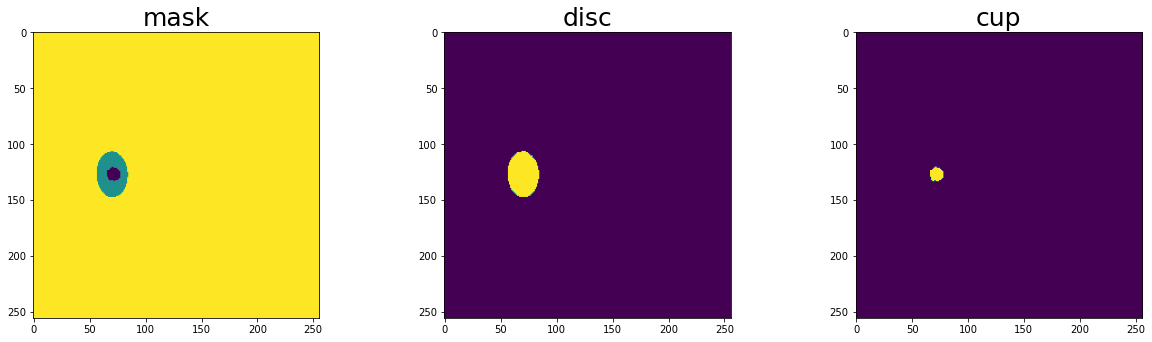

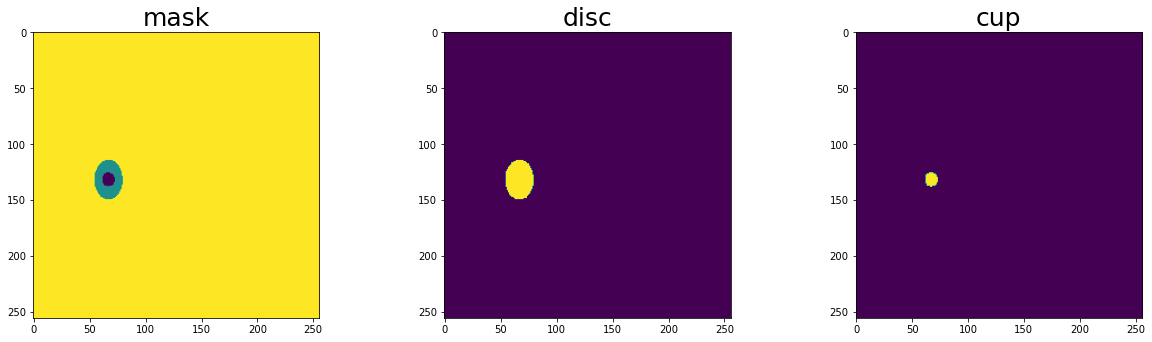

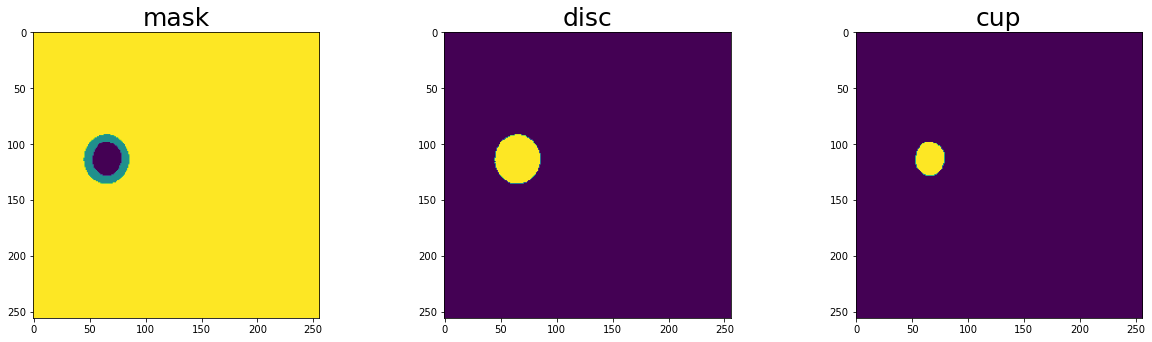

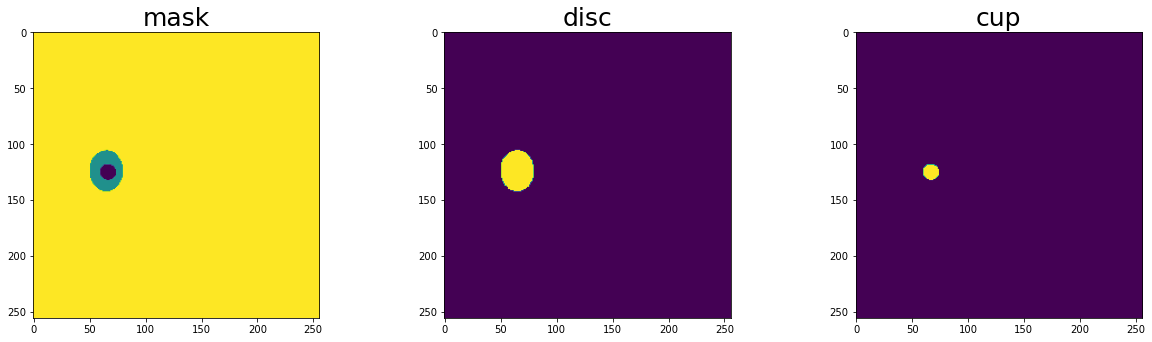

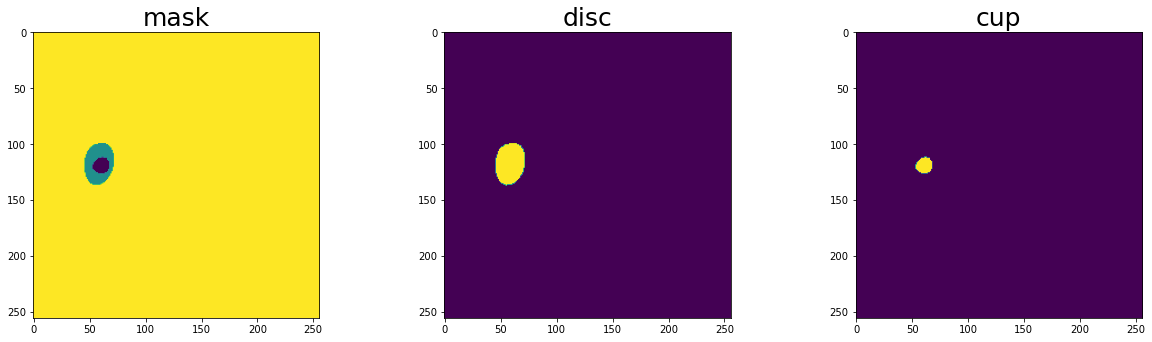

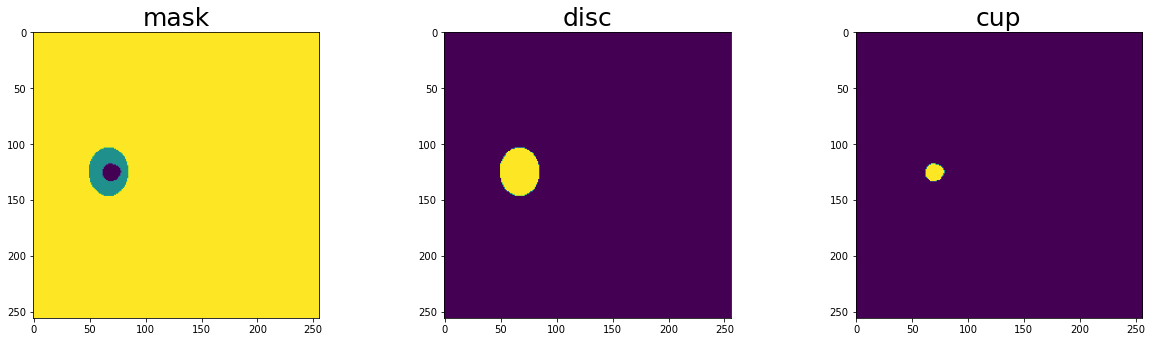

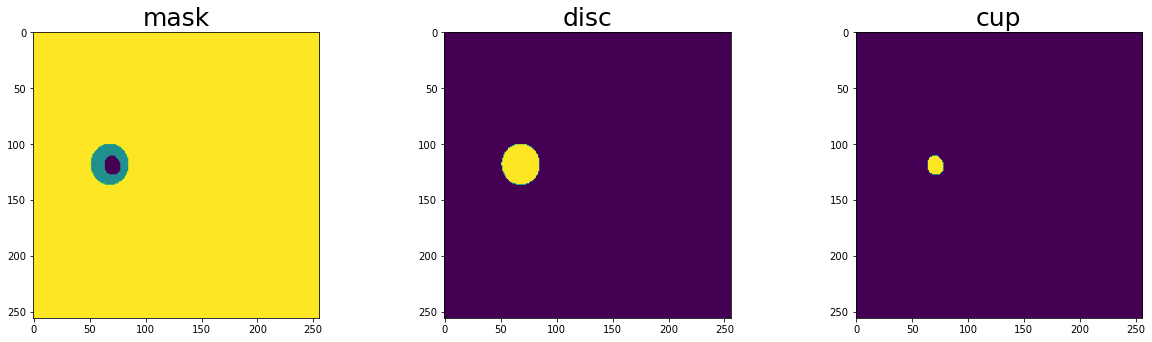

In [148]:
for i in range(10):
    img(i)

In [151]:
img_test =[]
images_folder = r'D:\A.papis\siri\test'
filenames = [os.path.join(images_folder,file) for file in os.listdir(images_folder) if file.endswith(".jpg")]
for i in filenames:
    img = cv2.imread(i,1)
    resized_img = cv2.resize(img,(256, 256), interpolation = cv2.INTER_CUBIC)
    
    img_test.append(resized_img)

In [153]:
print(len(img_test))

48


In [154]:
img_test= np.array(img_test)

In [156]:
print(img_test.shape)

(48, 256, 256, 3)


In [157]:
import pickle

pickle_out=open('X.pickle','wb')
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out=open('y_disc.pickle','wb')
pickle.dump(disc,pickle_out)
pickle_out.close()

pickle_out=open('y_cup.pickle','wb')
pickle.dump(cup,pickle_out)
pickle_out.close()

pickle_out=open('img_test.pickle','wb')
pickle.dump(img_test,pickle_out)
pickle_out.close()


In [9]:
import pickle

pickle_out=open('Y.pickle','wb')
pickle.dump(Y,pickle_out)
pickle_out.close()
